<a href="https://colab.research.google.com/github/InsightInspector/FTW4-Github-Homework-2/blob/master/Pandas_Storytelling_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PYTHON HOMEWORK - MATPLOTLIB

In [3]:
import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

In [5]:
from google.colab import files
files.upload()

Saving dirty_insurance.csv to dirty_insurance.csv


{'dirty_insurance.csv': b'customer_id,age,sex,bmi,children,smoker,region,charges\r\nm18331172523,18,male,33.77,1,no,southeast,1725.5523\r\nm18340113711,18,male,34.1,0,no,southeast,\r\nf18260219885,18,female,,0,no,nrtheast,2198.18985\r\nf18382339335,18,woman,38.67,2,no,northeast,3393.35635\r\nf18350221175,18,female,35.63,0,no,n.west,2211.13075\r\nf18350221175,18,female,35.63,0,no,n.west,2211.13075\r\nf18300213467,18,female,30.12,0,no,northeast,21344.8467\r\nm18230170545,18,man,,0,no,nrtheast,\r\nm18250155125,18,male,25.18,0,no,northeast,15518.18025\r\nf18360361435,18,female,36.85,0,no,s.east,36149.4835\r\nm18150169464,18,male,15.96,0,no,northeast,1694.7964\r\nf18380163112,18,female,38.28,0,no,southeast,1631.8212\r\nm18340113797,18,male,34.43,0,no,southeast,1137.4697\r\nf18260161567,18,woman,26.73,0,no,southeast,1615.7667\r\nm18172128251,18,male,17.29,2,no,n.east,12829.4551\r\nm18291171963,18,male,29.37,1,no,southeast,1719.4363\r\nm18220170481,18,male,22.99,0,no,n.east,\r\nf18380141375,1

In [6]:
# Convert the files to a pandas dataframe
data = pd.read_csv('dirty_insurance.csv')

# Print a preview of the file
data.head()

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,woman,38.67,2,no,northeast,3393.35635
4,f18350221175,18,female,35.63,0,no,n.west,2211.13075


In [7]:
# View the number of rows and columns in tha dataframe
data.shape

(1339, 8)

In [8]:
# View the dataframe information including the data types and value counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1339 non-null   object 
 1   age          1339 non-null   int64  
 2   sex          1339 non-null   object 
 3   bmi          1337 non-null   float64
 4   children     1339 non-null   int64  
 5   smoker       1339 non-null   object 
 6   region       1339 non-null   object 
 7   charges      1336 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [9]:
# Describe the basic statistical measures of the data
data.describe()

,age,bmi,children,charges
count,1339.000000,1337.000000,1339.000000,1336.000000
mean,39.194922,30.678751,1.092606,13264.230983
std,14.051691,6.098401,1.205529,12100.401585
min,18.000000,15.960000,0.000000,1121.873900
25%,26.500000,26.320000,0.000000,4744.325050
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
#Determing unique values in the sex column
data['sex'].unique()

array(['male', 'female', 'woman', 'man'], dtype=object)

In [11]:
# Replace woman with female

data = data.replace(['woman'], 'female')
data['sex'].unique()

array(['male', 'female', 'man'], dtype=object)

In [12]:
# Replace man with male

data = data.replace(['man'], 'male')
data['sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
data.head()

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,female,38.67,2,no,northeast,3393.35635
4,f18350221175,18,female,35.63,0,no,n.west,2211.13075


In [14]:
#Drop Null Values

data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1335 non-null   object 
 1   age          1335 non-null   int64  
 2   sex          1335 non-null   object 
 3   bmi          1335 non-null   float64
 4   children     1335 non-null   int64  
 5   smoker       1335 non-null   object 
 6   region       1335 non-null   object 
 7   charges      1335 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [15]:
# Convert yes and no to 1 and 0

data['smoker'] = data['smoker'].replace({'yes' : 1, 'no' : 0})
data.head()

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,0,southeast,1725.55230
3,f18382339335,18,female,38.67,2,0,northeast,3393.35635
4,f18350221175,18,female,35.63,0,0,n.west,2211.13075
5,f18350221175,18,female,35.63,0,0,n.west,2211.13075
6,f18300213467,18,female,30.12,0,0,northeast,21344.84670


In [16]:
# Convert from smoker column from object to int

pd.to_numeric(data['smoker'], errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1335 non-null   object 
 1   age          1335 non-null   int64  
 2   sex          1335 non-null   object 
 3   bmi          1335 non-null   float64
 4   children     1335 non-null   int64  
 5   smoker       1335 non-null   int64  
 6   region       1335 non-null   object 
 7   charges      1335 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 93.9+ KB


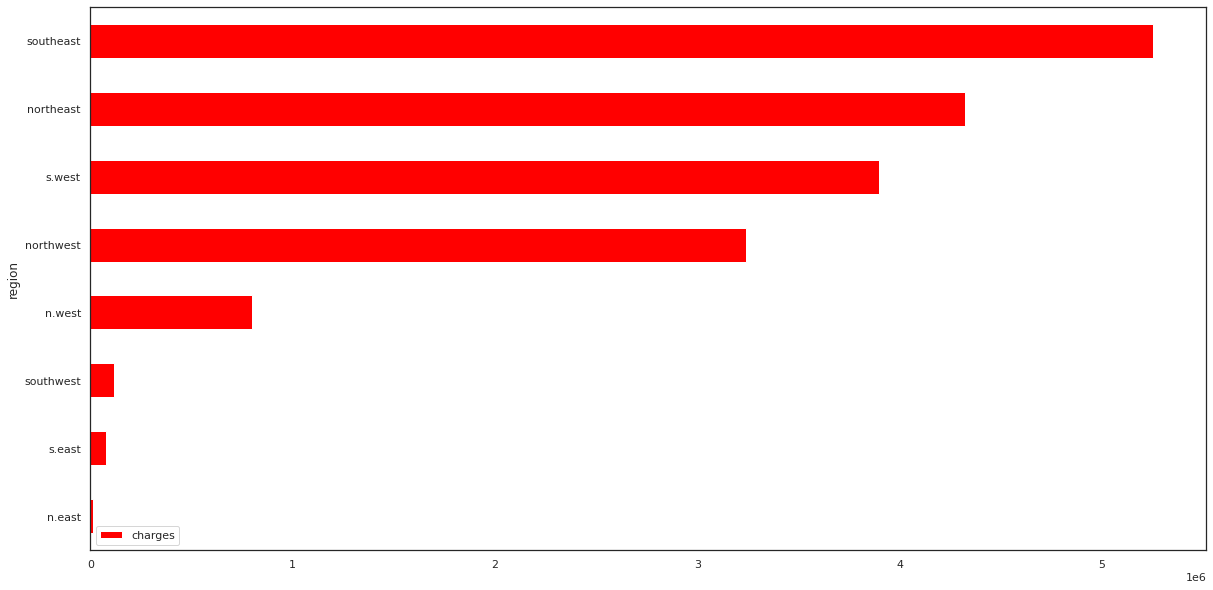

In [51]:
# Southeast Region has the highest insurance charges

data[['region','charges']].groupby("region").agg("sum").sort_values("charges",ascending=True).plot.barh(color = 'red')

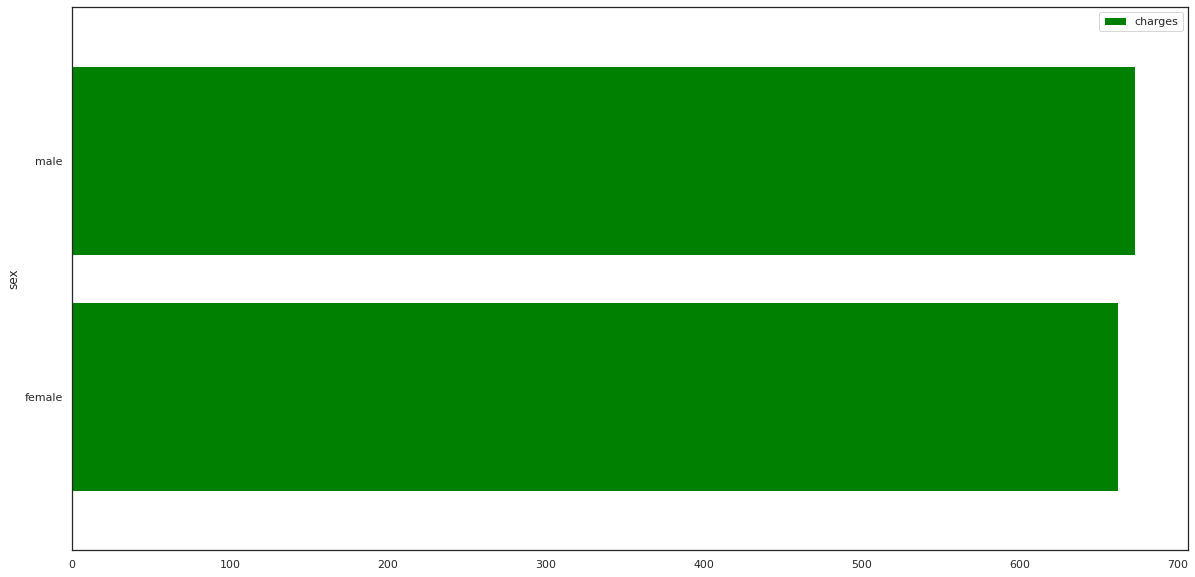

In [52]:
data[['sex','charges']].groupby("sex").agg("count").plot.barh(width = .8, color = 'green')

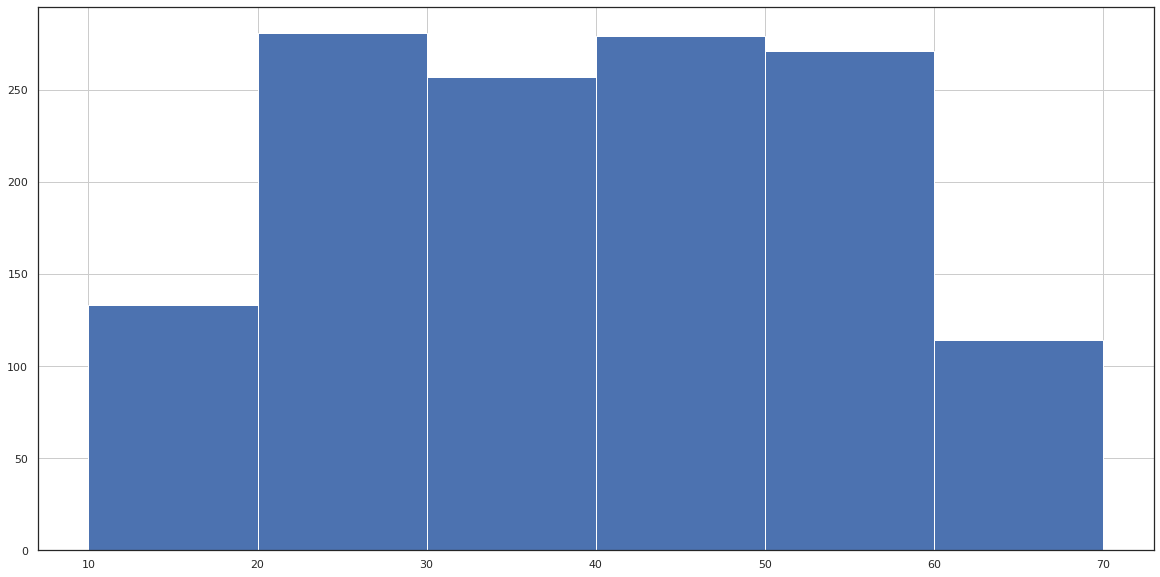

In [85]:
data['age'].hist(bins = 6, range = (10,70))

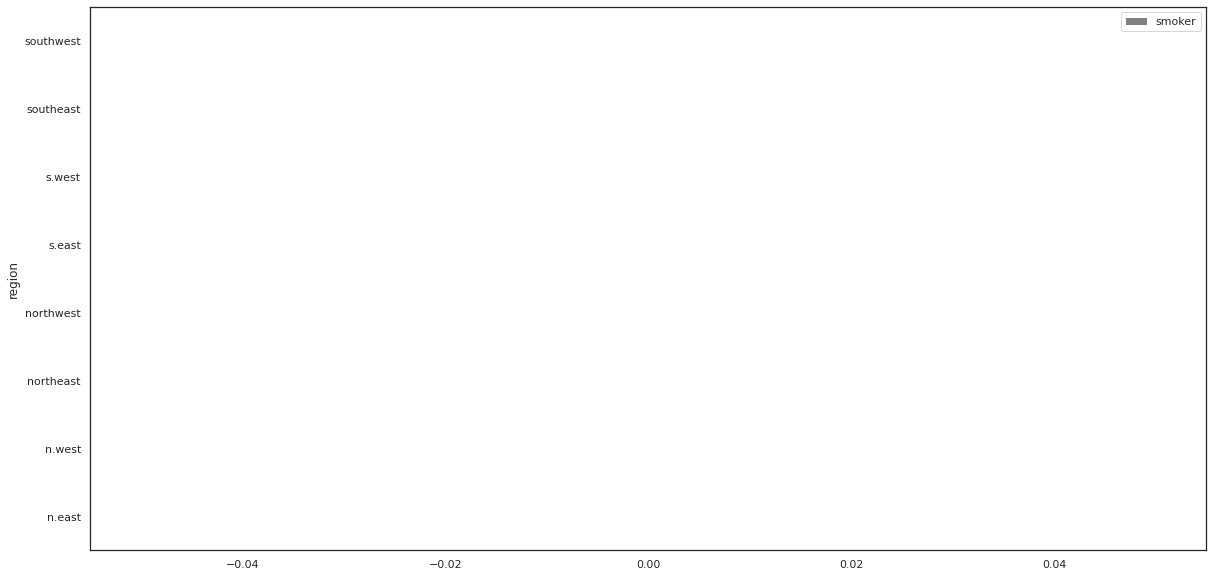

In [18]:
#Plot smoker data

data[['region','smoker']].groupby("region").agg("sum").sort_values("smoker",ascending=True).plot.barh(color = 'gray')

In [19]:
# Verify number of smokers

data['smoker'].sum() ## there are no smokers

0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


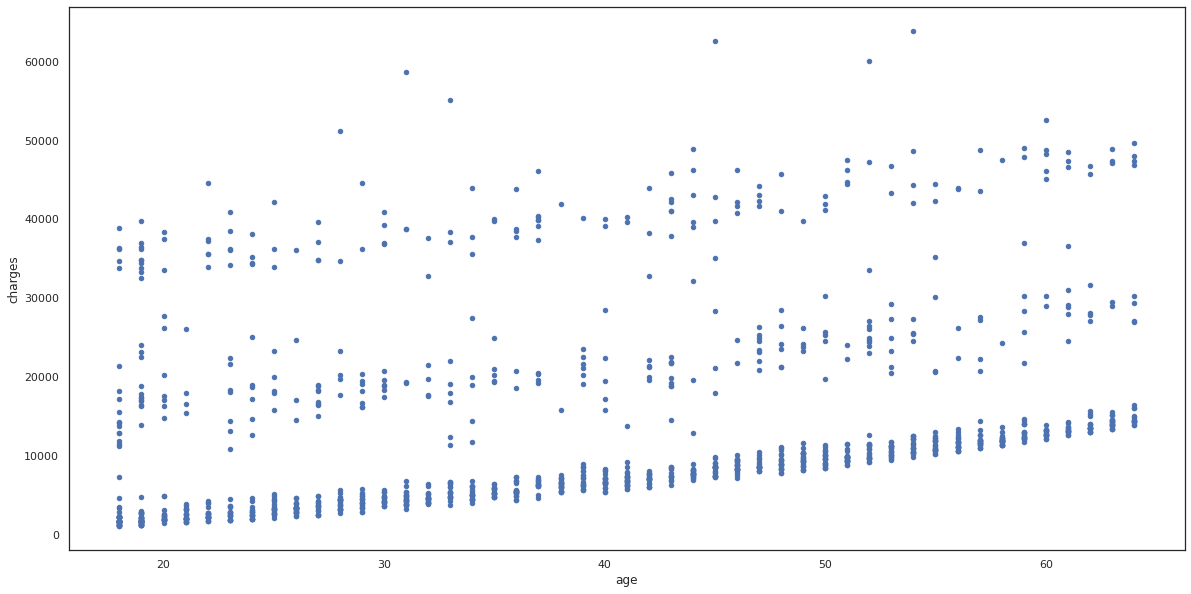

In [36]:
#Check the correlation between charges and age

data[['age','charges']].plot.scatter(x="age",y="charges")

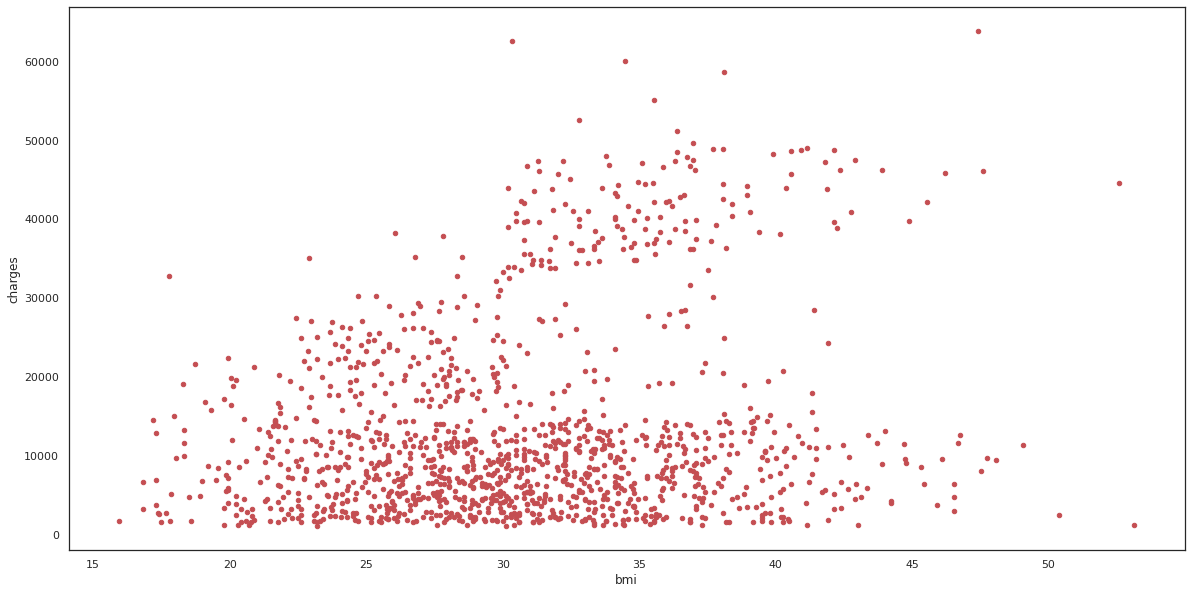

In [34]:
#Check the correlation between charges and age

data[['bmi','charges']].plot.scatter(x="bmi",y="charges", color = 'r')

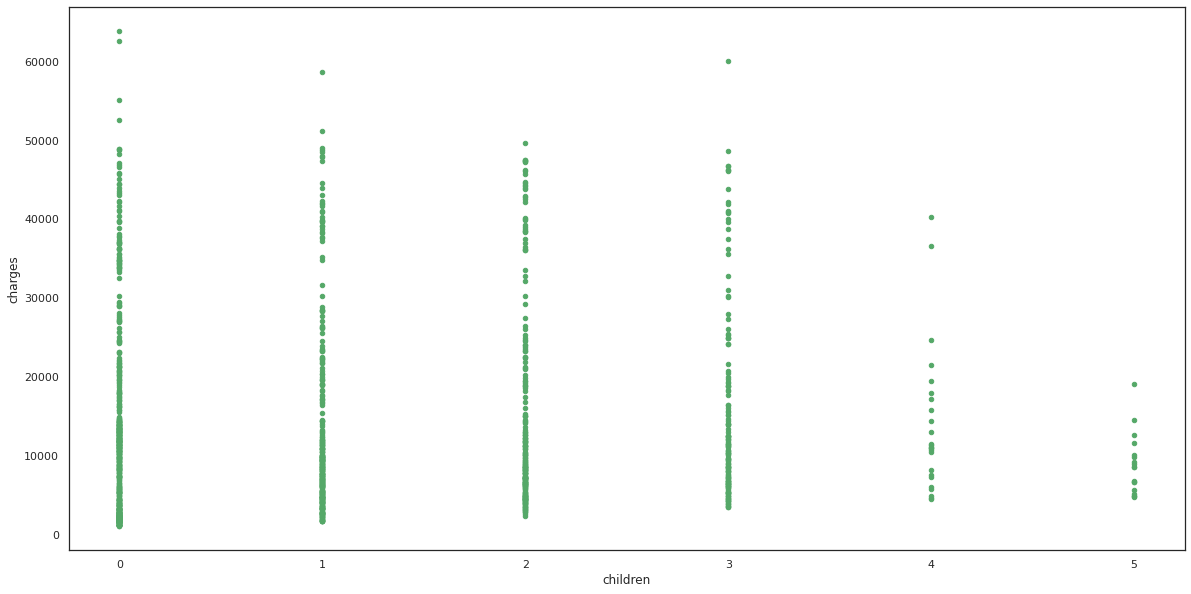

In [35]:
#Check the correlation between charges and no of children

data[['children','charges']].plot.scatter(x="children",y="charges", color = 'g')